# Курсовая работа.
*Pandas и Matplotlib*


<br><br>
**Описание работы:**

Перед вами стоит бизнес-задача – на основании имеющихся данных подготовить аналитический отчет, который в дальнейшем поможет продюсерам образовательных программ эффективно выстраивать стратегию по модернизированию и улучшению курсов. В начале отчета предлагается оформить емкий описательный блок по каждому курсу на основании рассчитанных показателей. Далее предлагается посчитать потенциальную нагрузку на преподавателей, чтобы оценить необходимость расширения штата сотрудников. Затем идет блок из двух пунктов по анализу качества контента курсов, где необходимо выявить проблемные модули, которые, возможно, требуют доработки. Также стоит задача выявить потенциальную сезонность. Каждый из пунктов анализа предполагается сопроводить аналитическим выводом на основании рассчитанных метрик.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание и начальная работа с данными](#1.1-Описание-и-начальная-работа-с-данными)<br>
[2. Расчет потенциальной нагрузки на преподавателей](#2.-Расчет-потенциальной-нагрузки-на-преподавателей)<br>
[3. Выявление проблемных модулей](#3.-Выявление-проблемных-модулей)<br>
[4. Расчет конверсии](#4.-Расчет-конверсии) <br>
[5. Метрика успеваемости ](#5.-Метрика-успеваемости)

## Codebook

`courses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `title` – название курса <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `field` – сфера, к которой относится курс <br> <br><br>
`students.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp; `city` – город студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `birthday` – день рождения студента <br> <br><br>
`course_contents.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `course_id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `module_title` – название модуля <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_title` – название урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_token` – токен урока <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `is_video` – наличие видео *(true/false)* <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `is_homework` – наличие домашней работы *(true/false)* <br>
<br><br>
`progresses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `student_id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `course_id` – идентификатор курса <br> <br><br>
`progress_phases.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `progress_id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `status` – статус прохождения урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `start_date` – дата начала <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `finish_date` – дата окончания <br>
<br><br>

## 1. Описание и начальная работа с данными

<br>

Объеденю датасеты (кроме `students.scv`) в один общий для дальнейшей работы. Отдельный датасет создам для расчета среднего возраста студентов курсов (отдельный датасет со `students.scv` нужен, чтобы не потерять значения в основном датасете из-за того, что не по всем студентам есть анкетные данные о дате рождения). <br> <br>
Опишу данные: <br>
1. Посчитаю
      * [общее количество курсов в датасете, ](#Общее-количество-курсов-в-датасете)
      * [количество модулей на каждом курсе,](#Количество-модулей-на-каждом-курсе) 
      * [количество уроков в каждом модуле на каждом курсе, ](#Количество-уроков-в-каждом-модуле-на-каждом-курсе)
      * [медианное количество уроков в модуле на каждом курсе, ](#Медианное-количество-уроков-в-модуле-на-каждом-курсе)
      * [количество учеников на каждом курсе, ](#Количество-учеников-на-каждом-курсе)
      * [минимальный, максимальный, средний, медианный возраст студентов,](#Минимальный,-максимальный,-средний,-медианный-возраст-студентов)
      * [минимальный, максимальный, средний, медианный возраст студентов на каждом курсе](#Минимальный,-максимальный,-средний,-медианный-возраст-студентов-на-каждом-курсе)
2. [Строю bar-chart, отражающий количество студентов на каждом курсе.](#Строю-bar-chart,-отражающий-количество-студентов-на-каждом-курсе)<br>
3. [Строю горизонтальный bar-chart, отражающий количество студентов на каждом курсе.](#Строю-горизонтальный-bar-chart,-отражающий-количество-студентов-на-каждом-курсе)<br>
4. [На основании рассчитанных значений опишу данные.](#Заключение-1)

_____________________________________________________________________


In [1]:
# Импортирую библиотеки
import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import calendar
import random
import time
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
%matplotlib inline

In [2]:
# Читаем все БД
df_courses = pd.read_csv("data/courses.csv")
df_students = pd.read_csv("data/students.csv")
df_course_contents = pd.read_csv("data/course_contents.csv")
df_progresses = pd.read_csv("data/progresses.csv")
df_progress_phases = pd.read_csv("data/progress_phases.csv")

In [3]:
# Проверяем кол-во строк
df_progress_phases.shape

(350677, 6)

In [4]:
# Объединяем progress_phases и progresses
df1 = pd.merge(df_progress_phases, df_progresses, left_on='progress_id', right_on='id', how='left')

In [5]:
# Объединяем df1 и course_contents
df2 = pd.merge(df1, df_course_contents, left_on=['course_id', 'module_number', 'lesson_number'], right_on=['course_id', 'module_number', 'lesson_number'], how='left')

In [6]:
# Объединяем df2 и courses
df3 = pd.merge(df2, df_courses, left_on='course_id', right_on='id', how='left')

In [7]:
# Оставляем нужные столбцы
df_main = df3[['progress_id', 'module_number', 'lesson_number', 'status', 'start_date', 'finish_date', 'student_id', 'course_id', 'title', 'field', 'module_title', 'lesson_title', 'lesson_token', 'is_video', 'is_homework']]

In [8]:
# Переименовываем столбцы
df_main.columns=['progress_id', 'module_number', 'lesson_number', 'status', 'start_date', 'finish_date', 'student_id', 'course_id', 'course_title', 'course_field', 'module_title', 'lesson_title', 'lesson_token', 'is_video', 'is_homework']

In [9]:
# Проверяем кол-во строк
df_main.shape

(350677, 15)

In [10]:
# Делаем проверку основного датасета
df_main

,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id,course_title,course_field,module_title,lesson_title,lesson_token,is_video,is_homework
0,a387ab916f402cb3fbfffd29f68fd0ce,2,4,done,2018-06-23 08:28:50.681065+00,2018-06-23 08:28:52.439542+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False
1,a387ab916f402cb3fbfffd29f68fd0ce,1,1,done,2018-06-20 14:25:21.783762+00,2018-06-20 15:45:07.717209+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Интро курса,df1a1f20-cdf7-443d-b25b-0a4b990b84d9,True,False
2,a387ab916f402cb3fbfffd29f68fd0ce,2,2,done,2018-06-23 08:18:09.653771+00,2018-06-23 08:18:12.784616+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Что такое концептуальный дизайн,f23b1890-9365-406f-816b-04864cefe58f,True,False
3,a387ab916f402cb3fbfffd29f68fd0ce,1,4,done,2018-06-20 16:00:06.36178+00,2018-06-21 19:09:30.845034+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Личное позиционирование,9dd50916-4aa6-4a73-b86c-56a1bd7753c8,True,False
4,a387ab916f402cb3fbfffd29f68fd0ce,1,6,done,2018-06-21 19:10:36.957891+00,2018-06-28 15:59:25.320418+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350672,ea9c93865c1de54a5079b7ae71c88683,3,2,start,2019-07-16 23:02:33.4829+00,NaN,25ec58029696f8b7de38d22e5e01c7ea,bf27a4bf4ada4c756451703ea62a914f,Интернет-маркетолог от Ingate,Marketing,"SEO: больше, чем поисковая выдача (обновление ...",Что такое SEO,54905985-9222-493c-bebe-cbdf4c6535b1,True,False
350673,ea9c93865c1de54a5079b7ae71c88683,2,4,done,2019-07-02 15:34:32.134806+00,2019-07-02 16:32:15.491277+00,25ec58029696f8b7de38d22e5e01c7ea,bf27a4bf4ada4c756451703ea62a914f,Интернет-маркетолог от Ingate,Marketing,Исследование целевой аудитории: портретировани...,Построение карты путей пользователя,dc58b42e-8440-4e08-9706-099b228fd534,True,False
350674,ea9c93865c1de54a5079b7ae71c88683,2,3,done,2019-07-01 21:46:27.908354+00,2019-07-01 21:48:04.806799+00,25ec58029696f8b7de38d22e5e01c7ea,bf27a4bf4ada4c756451703ea62a914f,Интернет-маркетолог от Ingate,Marketing,Исследование целевой аудитории: портретировани...,Сбор данных,b19caa4b-bf5d-4db4-86fb-a65ffe63fc00,True,False
350675,ea9c93865c1de54a5079b7ae71c88683,2,2,done,2019-06-30 22:41:33.705765+00,2019-07-01 07:44:00.370798+00,25ec58029696f8b7de38d22e5e01c7ea,bf27a4bf4ada4c756451703ea62a914f,Интернет-маркетолог от Ingate,Marketing,Исследование целевой аудитории: портретировани...,Сегментация ЦА и составление портрета клиента,d1ddacdc-797c-4115-afd4-31a05cda738d,True,False


### Общее количество курсов в датасете

In [11]:
# Общее количество курсов в датасете
coerse_sum = list(df_main.groupby('course_title'))
print('Общее количество курсов в датасете:', len(coerse_sum))

Общее количество курсов в датасете: 15


### Количество модулей на каждом курсе

In [12]:
# Количество модулей на каждом курсе
df_count_modul = df_main.groupby(['course_title', 'module_number']).size()
df_count_modul = pd.DataFrame(df_count_modul.groupby('course_title').count(), columns=['count_moduls'])
df_count_modul

,count_moduls
course_title,
Excel Базовый,9
Java-разработчик,17
Java-разработчик c нуля,9
JavaScript с нуля,18
PHP-разработчик с 0 до PRO. Часть 1,8
SMM-маркетолог от А до Я,11
UX-дизайн,20
Анимация интерфейсов,21
Веб-вёрстка для начинающих 2.0,8


### Количество уроков в каждом модуле на каждом курсе

In [13]:
# Количество уроков в каждом модуле на каждом курсе
df_count_lesson = df_main[['course_title', 'module_number', 'lesson_number']].groupby(['course_title', 'module_number']).agg({'lesson_number':'count'})
df_count_lesson.columns = ['count_lessons']
df_count_lesson

count_lessons
course_title                  module_number               
Excel Базовый                 1                       6492
                              2                       3191
                              3                       1225
                              4                       2431
                              5                       1530
...                                                    ...
Руководитель digital-проектов 13                       355
                              14                       523
                              15                       803
                              16                       515
                              17                       236

[229 rows x 1 columns]

### Медианное количество уроков в модуле на каждом курсе

In [14]:
# Медианное количество уроков в модулях на каждом курсе
df_count_median = df_count_lesson.groupby('course_title').agg({'count_lessons':'median'})
df_count_median.columns = ['median_count_lessons']
df_count_median

,median_count_lessons
course_title,
Excel Базовый,1347.0
Java-разработчик,810.0
Java-разработчик c нуля,1289.0
JavaScript с нуля,600.5
PHP-разработчик с 0 до PRO. Часть 1,477.5
SMM-маркетолог от А до Я,340.0
UX-дизайн,251.5
Анимация интерфейсов,119.0
Веб-вёрстка для начинающих 2.0,3085.0


### Количество учеников на каждом курсе

In [15]:
# Количество учеников на каждом курсе
df_count_students = df_main[['course_title', 'student_id']].groupby(['course_title', 'student_id']).size()
df_count_students = pd.DataFrame(df_count_students.groupby('course_title').count(), columns=['count_students'])
df_count_students

,count_students
course_title,
Excel Базовый,782
Java-разработчик,763
Java-разработчик c нуля,581
JavaScript с нуля,966
PHP-разработчик с 0 до PRO. Часть 1,854
SMM-маркетолог от А до Я,506
UX-дизайн,1151
Анимация интерфейсов,598
Веб-вёрстка для начинающих 2.0,2004


### Минимальный, максимальный, средний, медианный возраст студентов

In [16]:
# Минимальный, максимальный, средний, медианный возраст студентов
from datetime import datetime, date

# Функция считающая возраст
def get_age(birthday):
    today = date.today()
    age = today.year - birthday.year
    if today.month < birthday.month:
        age -= 1
    elif today.month == birthday.month and today.day < birthday.day:
        age -= 1
    return round(age, 0)

# Объединяем общий датасет и студентов
df_studets_main = pd.merge(df_main, df_students, left_on='student_id', right_on='id', how='left')

# Преобразовываем в тип datetime
df_studets_main['birthday'] = pd.to_datetime(df_studets_main['birthday'], errors='coerce')

# Удаляем нулевые значения
df_studets_main.dropna(subset=['birthday', 'city', 'finish_date'], inplace=True)

# Создаем столбец с возрастом
df_studets_main['age'] = df_studets_main['birthday'].apply(get_age)

# Удаляем возраст с отрицательными значениями

df_studets_main = df_studets_main.loc[(df_studets_main['age'] > 15) & (df_studets_main['age'] < 70)]

# Выводим минимальный, максимальный, средний, медианный возраст студентов
df_studets_main['age'].agg({'age':['min', 'max', 'mean', 'median']})

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: FutureWarning: using a dict with renaming is deprecated and will be removed
in a future version.

For column-specific groupby renaming, use named aggregation

    >>> df.groupby(...).agg(name=('column', aggfunc))



age  min       16.000000
     max       64.000000
     mean      29.520454
     median    29.000000
Name: age, dtype: float64

### Минимальный, максимальный, средний, медианный возраст студентов на каждом курсе

In [17]:
# Минимальный, максимальный, средний, медианный возраст студентов на каждом курсе
df_studets_main.groupby('course_title').agg({'age':['min', 'max', 'mean', 'median']})

age                      
                                    min max       mean median
course_title                                                 
Excel Базовый                        16  60  33.021794     33
Java-разработчик                     16  64  29.692192     29
Java-разработчик c нуля              16  55  29.628910     29
JavaScript с нуля                    16  59  28.187149     28
PHP-разработчик с 0 до PRO. Часть 1  16  59  30.678841     29
SMM-маркетолог от А до Я             17  52  28.434953     28
UX-дизайн                            16  57  30.083627     30
Анимация интерфейсов                 16  51  29.657482     29
Веб-вёрстка для начинающих 2.0       16  59  28.405678     27
Веб-дизайн PRO 2.0                   16  59  28.370483     27
Веб-дизайн Базовый                   17  51  28.372994     28
Веб-дизайн с нуля 2.0                16  59  28.115163     27
Веб-разработчик                      16  51  27.294819     26
Интернет-маркетолог от Ingate        16  57  31.301311     30
Руководитель digital-проектов        20  47  31.836098     31

### Строю bar-chart, отражающий количество студентов на каждом курсе

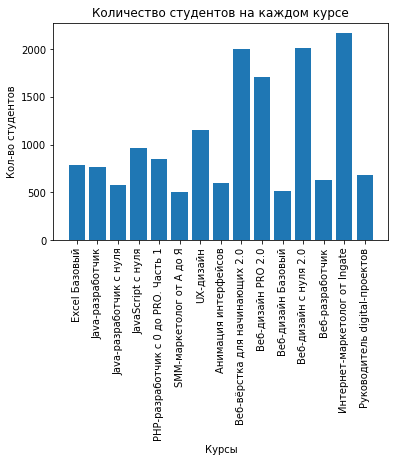

In [18]:
# Назначим Х и У
x = np.array(df_count_students.index)
y = [int(df_count_students.values[i]) for i in range(len(df_count_students.values))]

# Строим bar
plt.bar(x, y)
plt.xticks(x, rotation='vertical')
plt.ylabel('Кол-во студентов')
plt.xlabel('Курсы')
plt.title('Количество студентов на каждом курсе')

plt.show()

### Строю горизонтальный bar-chart, отражающий количество студентов на каждом курсе

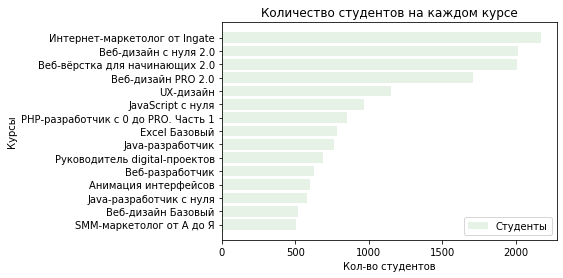

In [19]:
# Сортируем датасет
df_count_stud_sort = df_count_students.sort_values('count_students')
# Назначаем Х и У
x = np.array(df_count_stud_sort.index)
y = [int(df_count_stud_sort.values[i]) for i in range(len(df_count_stud_sort.values))]

# Создаем график
x_x = np.arange(len(x))
plt.barh(x_x, y, color='g', label='Студенты', alpha=0.1)
plt.yticks(x_x, x)
plt.xlabel('Кол-во студентов')
plt.ylabel('Курсы')
plt.title('Количество студентов на каждом курсе')
plt.legend()
plt.show()

### Заключение 1
Общее кол-во курсов 15. На каждом курсе от 8 до 21 модуля. Кол-во уроков в каждом модуле может достигать до 1500, а кол-во учеников на каждом курсе может достигать 2168. Средний возраст студентов 29, самому старшему ученику 119, а младшему 1 год.
Скоро повысится конкуренция на такие направления как Интернет маркейтинг, Веб дизайн и Веб верстка.

## 2. Расчет потенциальной нагрузки на преподавателей

**1**. [Рассчитываю прирост студентов на каждом курсе в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно). Считаю дату начала прохождения курса студентом по дате начала первой домашней работы.](#2.1)<br>
**2**. [На основании первого пункта строю line-graph с приростом студентов в каждом месяце для каждого курса. 15 графиков.](#2.2)<br>
**3**. [На основании первого пункта строю line-graph с несколькими линиями, отражающими прирост студентов в каждом месяце для каждого курса. 15 линий на графике.](#2.3)<br>
**4**. [Рассчитываю количество прогрессов по выполнению домашних работ в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно) для каждого курса. Учитываю, что выполнение домашнего задания может перетекать из одного месяца в другой.](#2.4)<br>
**5**. [Строю line-graph по четвертому пункту. 15 графиков.](#2.5)<br>
**6**. [Строю один line-graph для всех курсов по четвертому пункту. 15 линий на графике.](#2.6)<br>
**7**. [На основании рассчитанных значений делаю аналитический вывод.](#Заключение-2)

### 2.1

In [20]:
# Подготавливаем датасет
df_students_month = df_main[['module_number', 'progress_id', 'course_title', 'start_date', 'student_id', 'is_homework']]

# оставляем только дату без времени
f = lambda x: x.split()[0]
df_students_month['start_date'] = df_students_month['start_date'].apply(f)

# Приводим к datetime
df_students_month['start_date'] = pd.to_datetime(df_students_month['start_date'])

# Добавляем столбцы год и месяц
df_students_month['year'] = df_students_month['start_date'].dt.year
df_students_month['month'] = df_students_month['start_date'].dt.month

# Номер месяца в названии месяца
df_students_month['month_name'] = df_students_month['month'].apply(lambda x: calendar.month_abbr[x])

# Готовим DF гле будут только домашние работы
df_zadanie = df_students_month[df_students_month.is_homework == True]


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http:

In [21]:
# Создаем DF
df_new_students_count = pd.DataFrame(columns=['module_number', 
                                               'progress_id', 
                                               'course_title', 
                                               'start_date', 
                                               'student_id', 
                                               'is_homework', 
                                               'year', 
                                                'month', 
                                                'month_name'])

In [22]:
# Формируем DF с первыми ДЗ
for name_courses in df_courses.title:
    for number_module in range(1,10,1):
        maska = (df_zadanie.course_title == name_courses) & (df_zadanie.module_number == number_module)
        # Проверяем, есть ли в модуле домашние задания
        if len(df_zadanie[maska]) > 0:
            df_new_students_count = pd.concat([df_new_students_count, df_zadanie[maska]], ignore_index=True)
            break

In [23]:
# Добавляем пустые значения за те месяца где не было студентов 
for name_courses in df_courses.title:
    for year_step in range(2016, 2020, 1):
        for month_step in range(1, 13, 1):
            maska = (df_new_students_count.course_title == name_courses) & \
                    (df_new_students_count.year == year_step) & \
                    (df_new_students_count.month == month_step)
            # Проверяем, есть ли по "названию курса" в "году"&"месяце" данные
            if len(df_new_students_count[maska]) == 0:
                value_month = '0' + str(month_step) if month_step < 10 else month_step
                # Готовим данные для добавления
                a_row = {'module_number': 1, 
                         'progress_id': np.nan, 
                         'course_title': name_courses, 
                         'start_date': '{}-{}-01'.format(str(year_step),str(value_month)), 
                         'student_id': np.nan, 
                         'is_homework': True, 
                         'year': year_step, 
                         'month': month_step, 
                         'month_name': calendar.month_abbr[month_step]}
                # Добавляем строку
                df_new_students_count.loc[len(df_new_students_count) + 1] = a_row


# Приводим к datetime
df_new_students_count['start_date'] = pd.to_datetime(df_new_students_count['start_date'])

# Сортируем между двумя датами
start_date = '2016-03-01'
end_date = '2019-07-31'

mask = (df_new_students_count['start_date'] >= start_date) & \
            (df_new_students_count['start_date'] <= end_date)

df_zadanie = df_new_students_count.loc[mask]

In [24]:
# Группируем, сортируем и выводим
df_group_students_month_1 = df_zadanie.groupby(['course_title', 'month_name', 'month', 'year'], sort=False).agg({'student_id':'count'})
df_sorting_1 = df_group_students_month_1.sort_values(['course_title', 'year', 'month'])
df_sorting_1.columns = ['count_students']

In [25]:
df_sorting_1.head(30)

count_students
course_title  month_name month year                
Excel Базовый Mar        3     2016               0
              Apr        4     2016               0
              May        5     2016               0
              Jun        6     2016               0
              Jul        7     2016               0
              Aug        8     2016               0
              Sep        9     2016               0
              Oct        10    2016               0
              Nov        11    2016               0
              Dec        12    2016               0
              Jan        1     2017               0
              Feb        2     2017               0
              Mar        3     2017               0
              Apr        4     2017               0
              May        5     2017               0
              Jun        6     2017               0
              Jul        7     2017               0
              Aug        8     2017               0
              Sep        9     2017               0
              Oct        10    2017               0
              Nov        11    2017               0
              Dec        12    2017               0
              Jan        1     2018               0
              Feb        2     2018               6
              Mar        3     2018               3
              Apr        4     2018               0
              May        5     2018               3
              Jun        6     2018               9
              Jul        7     2018              13
              Aug        8     2018              15

### 2.2

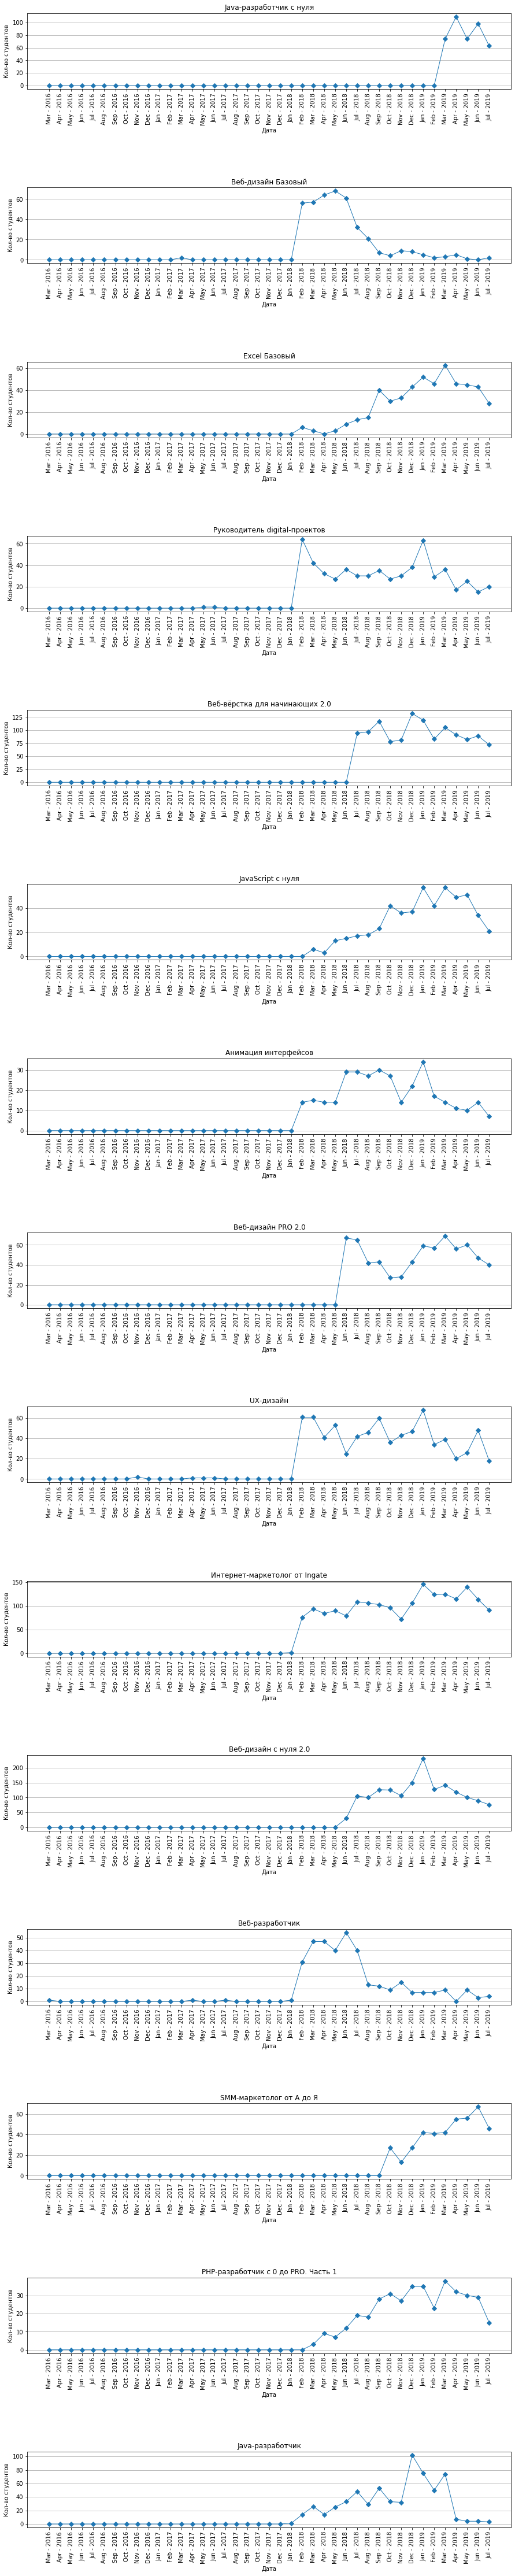

In [26]:
fig = plt.figure()

# Выводим графики
for number, name_course in enumerate(df_courses.title):    
    x = [i[1] + ' - ' + str(i[3]) for i in df_sorting_1.index if i[0] == name_course]
    y = [df_sorting_1.values[number][0] for number, value in enumerate(df_sorting_1.index) if value[0] == name_course]
    
    grafic = fig.add_subplot(15, 1, number + 1, title = name_course)
    grafic.plot(x, y, linewidth=1, marker='D')
    
    plt.xlabel('Дата')
    plt.ylabel('Кол-во студентов')
    plt.xticks(x, rotation='vertical')
    fig.set_figwidth(15)
    fig.set_figheight(80)
    plt.grid(axis='y')
    plt.subplots_adjust(wspace=0, hspace=1.3)



### 2.3

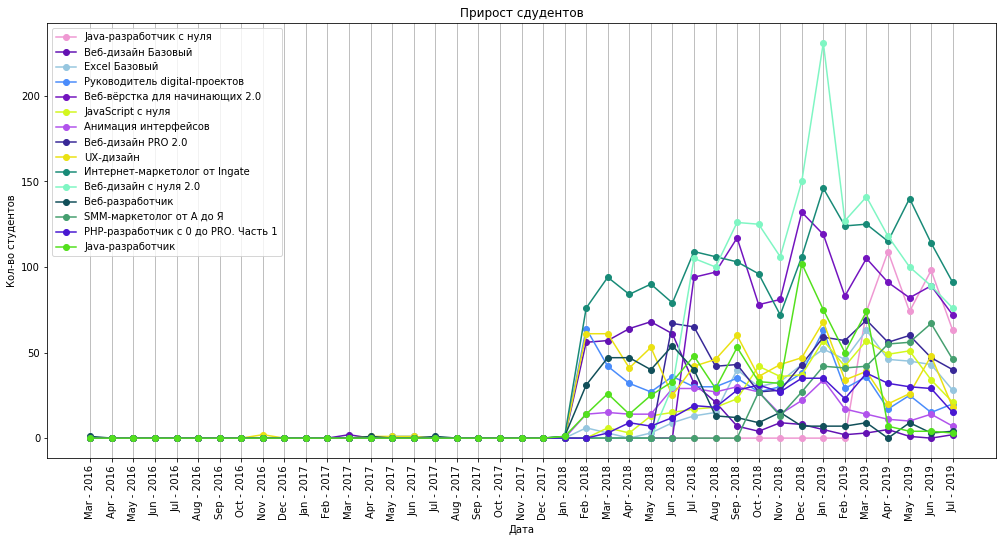

In [27]:
fig, ax = plt.subplots()
r = lambda: random.randint(0,255)

for number, name_course in enumerate(df_courses.title):    
    x = [i[1] + ' - ' + str(i[3]) for i in df_sorting_1.index if i[0] == name_course]
    y = [df_sorting_1.values[number][0] for number, value in enumerate(df_sorting_1.index) if value[0] == name_course]
    ax.plot(x,y, label=name_course, marker='o', color='#%02X%02X%02X' % (r(),r(),r()))

plt.xlabel('Дата')
plt.ylabel('Кол-во студентов')
plt.title('Прирост сдудентов')
plt.xticks(x, rotation='vertical')
fig.set_figwidth(17)
fig.set_figheight(8)
plt.grid(axis='x')
plt.legend()
plt.show()


### 2.4

In [28]:
# Подготавливаем датасет
df_progress_month = df_main[['course_title', 'progress_id', 'start_date', 'finish_date', 'is_homework']]

# оставляем только дату без времени
def date_without_time(date):
    try:
        return date.split()[0]
    except AttributeError:
        return date
df_progress_month['start_date'] = df_progress_month['start_date'].apply(date_without_time)
df_progress_month['finish_date'] = df_progress_month['finish_date'].apply(date_without_time)

# Приводим к datetime
df_progress_month['start_date'] = pd.to_datetime(df_progress_month['start_date'], errors='coerce')
df_progress_month['finish_date'] = pd.to_datetime(df_progress_month['finish_date'], errors='coerce')

# Готовим DF гле будут только домашние работы
df_progress_month = df_progress_month[df_progress_month.is_homework == True]
df_progress_month = df_progress_month[['course_title', 'progress_id', 'start_date', 'finish_date']]

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [29]:
# Создаем дополнительный DF
df_count_progress_in_month = pd.DataFrame(columns=['course_title', 'progress_id', 'year-month-day'])

In [30]:
# Заполняем DF.
# Добавляем столько кол-во записей по курсу, сколько месяцев длилось выполнение домашней работы.
for value in df_progress_month.values:
    start_date = value[2]
    finish_date = start_date if pd.isna(value[3]) else value[3]

    while start_date <= finish_date:
        add_row = {'course_title':value[0],
                  'progress_id': value[1],
                  'year-month-day': start_date}
        df_count_progress_in_month.loc[len(df_count_progress_in_month)+1] = add_row
        start_date += pd.DateOffset(months=1)

In [31]:
# Добавляем столбцы год и месяц
df_count_progress_in_month['year'] = df_count_progress_in_month['year-month-day'].dt.year
df_count_progress_in_month['month'] = df_count_progress_in_month['year-month-day'].dt.month

# Номер месяца в названии месяца
df_count_progress_in_month['month_name'] = df_count_progress_in_month['month'].apply(lambda x: calendar.month_abbr[x])

In [32]:
# Добавляем пустые значения за те месяца где не было выполнение ДЗ 
for name_courses in df_courses.title:
    for year_step in range(2016, 2020, 1):
        for month_step in range(1, 13, 1):
            maska = (df_count_progress_in_month.course_title == name_courses) & \
                    (df_count_progress_in_month.year == year_step) & \
                    (df_count_progress_in_month.month == month_step)
            # Проверяем, есть ли по "названию курса" в "году"&"месяце" данные
            if len(df_count_progress_in_month[maska]) == 0:
                value_month = '0' + str(month_step) if month_step < 10 else month_step
                # Готовим данные для добавления
                progress_row = {'course_title': name_courses, 
                                 'progress_id': np.nan, 
                                 'year-month-day': '{}-{}-01'.format(str(year_step),str(value_month)), 
                                 'year': year_step, 
                                 'month': month_step, 
                                 'month_name': calendar.month_abbr[month_step]}
                # Добавляем строку
                df_count_progress_in_month.loc[len(df_count_progress_in_month) + 1] = progress_row

In [33]:
# Приводим к datetime
df_count_progress_in_month['year-month-day'] = pd.to_datetime(df_count_progress_in_month['year-month-day'], errors='coerce')

# Сортируем между двумя датами
start_date = '2016-03-01'
end_date = '2019-07-31'
mask = (df_count_progress_in_month['year-month-day'] >= start_date) & (df_count_progress_in_month['year-month-day'] <= end_date)

df_count_progress_in_month = df_count_progress_in_month.loc[mask]

# Группируем
df_group_progress_in_month = df_count_progress_in_month.groupby(['course_title', 'year', 'month', 'month_name']).agg({'progress_id':'count'})
df_group_progress_in_month.columns = ['count_progress']

In [34]:
df_group_progress_in_month.head(30)

count_progress
course_title  year month month_name                
Excel Базовый 2016 3     Mar                      0
                   4     Apr                      0
                   5     May                      0
                   6     Jun                      0
                   7     Jul                      0
                   8     Aug                      0
                   9     Sep                      0
                   10    Oct                      0
                   11    Nov                      0
                   12    Dec                      0
              2017 1     Jan                      0
                   2     Feb                      0
                   3     Mar                      0
                   4     Apr                      0
                   5     May                      0
                   6     Jun                      0
                   7     Jul                      0
                   8     Aug                      0
                   9     Sep                      0
                   10    Oct                      0
                   11    Nov                      0
                   12    Dec                      0
              2018 1     Jan                      0
                   2     Feb                     37
                   3     Mar                      7
                   4     Apr                     13
                   5     May                     17
                   6     Jun                     33
                   7     Jul                     71
                   8     Aug                     86

### 2.5

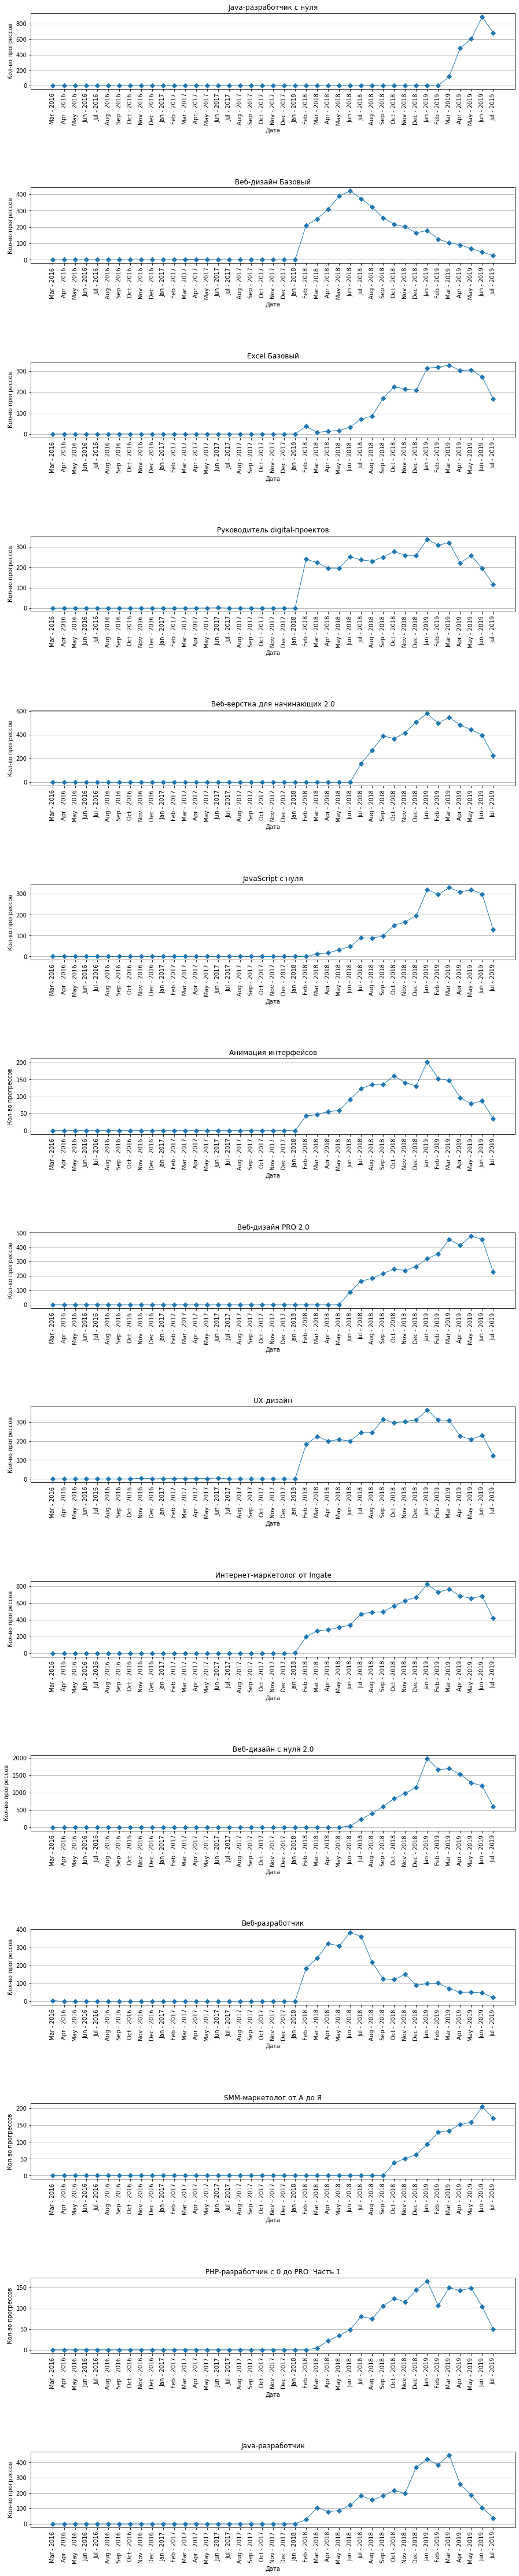

In [35]:
fig = plt.figure()

# Выводим графики
for number, name_course in enumerate(df_courses.title):    
    x = [str(i[3]) + ' - ' + str(i[1]) for i in df_group_progress_in_month.index if i[0] == name_course]
    y = [df_group_progress_in_month.values[number][0] for number, value in enumerate(df_group_progress_in_month.index) if value[0] == name_course]
    
    grafic = fig.add_subplot(15, 1, number + 1, title = name_course)
    grafic.plot(x, y, linewidth=1, marker='D')
    
    plt.xlabel('Дата')
    plt.ylabel('Кол-во прогрессов')
    plt.xticks(x, rotation='vertical')
    fig.set_figwidth(15)
    fig.set_figheight(80)
    plt.grid(axis='y')
    plt.subplots_adjust(wspace=0, hspace=1.3)


### 2.6

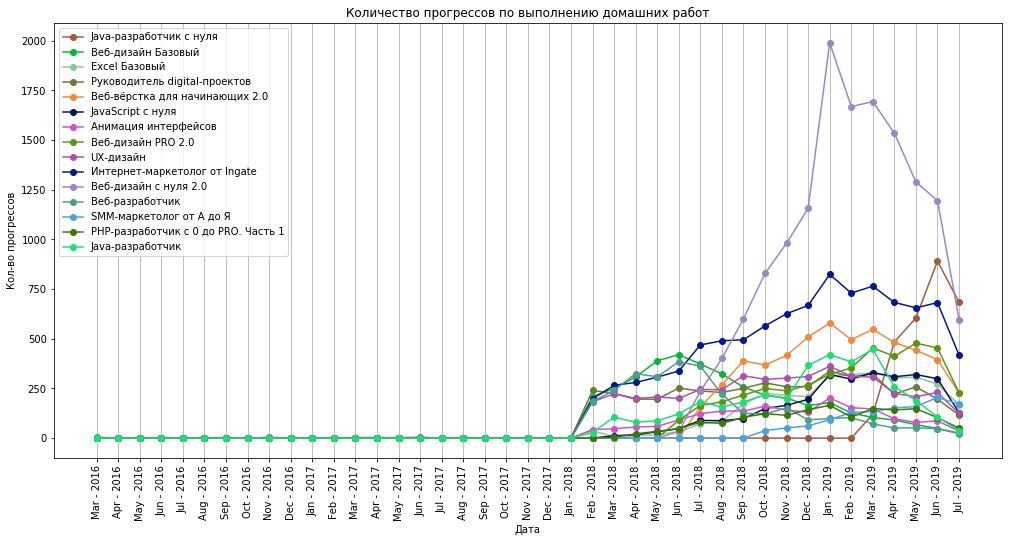

In [36]:
fig, ax = plt.subplots()
r = lambda: random.randint(0,255)

# Формируем график
for number, name_course in enumerate(df_courses.title):    
    x = [str(i[3]) + ' - ' + str(i[1]) for i in df_group_progress_in_month.index if i[0] == name_course]
    y = [df_group_progress_in_month.values[number][0] for number, value in enumerate(df_group_progress_in_month.index) if value[0] == name_course]
    ax.plot(x,y, label=name_course, marker='o', color='#%02X%02X%02X' % (r(),r(),r()))

# Выводим график
plt.xlabel('Дата')
plt.ylabel('Кол-во прогрессов')
plt.title('Количество прогрессов по выполнению домашних работ')
plt.xticks(x, rotation='vertical')
fig.set_figwidth(17)
fig.set_figheight(8)
plt.grid(axis='x')
plt.legend()
plt.show()

## Заключение 2

За последние 3 года основной прирост студентов был в январе 2018 года. Самый маленький прирост студентов был по курсу "Анимация интерфейсов". Самый большой прирост студентов был по курсу "Веб-дизайн с нуля 2.0" в январе 2019 года. 
В связи с этим самая большая нагрузка на преподавателей по проверки домашних работ была по курск "Веб-дизайн с нуля 2.0", а самая маленькая нагрузка по курсу "Анимация интерфейсов".

## 3. Выявление проблемных модулей

**1**. [Рассчитываю минимальное, максимальное, среднее, медианное время прохождения каждого модуля (разность между временем начала и окончания выполнения домашней работы) для каждого курса.](#3.1)<br>
**2**. [На основании первого пункта строю line-graph с медианным временем прохождения каждого модуля для каждого курса. 15 графиков.](#3.2)<br>
**3**. [Чтобы выявить сезонность, считаю медианное время выполнения домашней работы по месяцам (12 месяцев, январь-декабрь) для каждого курса.](#3.3)<br>
**4**. [На основании третьего пункта строю line-graph, на который будут нанесены линии для каждого курса с медианным временем выполнения домашней работы по месяцам. 15 линий на графике.](#3.4)<br>
**5**. [На основании рассчитанных значений делаю аналитический вывод.](#Заключение-3)

### 3.1

In [37]:
# Подготавливаем датасет
df_module_passing = df_main[['course_title', 'module_number', 'lesson_number', 'start_date', 'finish_date', 'is_homework']]

# Оставляем только дату без времени
def date_without_time(date):
    try:
        return date.split()[0]
    except AttributeError:
        return date
df_module_passing['start_date'] = df_module_passing['start_date'].apply(date_without_time)
df_module_passing['finish_date'] = df_module_passing['finish_date'].apply(date_without_time)

# Приводим к datetime
df_module_passing['start_date'] = pd.to_datetime(df_module_passing['start_date'], errors='coerce')
df_module_passing['finish_date'] = pd.to_datetime(df_module_passing['finish_date'], errors='coerce')

# Удаляем нулевые значения
df_module_passing.dropna(subset=['finish_date'], inplace=True)

# Готовим DF гле будут только домашние работы
df_module_passing = df_module_passing[df_module_passing.is_homework == True]

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [38]:
# Расчитываем разность между временем начала и окончания выполнения домашней работы
df_module_passing['days_passing_lesson'] = df_module_passing['finish_date'] - df_module_passing['start_date']

# Преобразовываем timedelta в float
f = lambda x: x / np.timedelta64(1, 'D')
df_module_passing['days_passing_lesson'] = df_module_passing['days_passing_lesson'].apply(f)

In [39]:
# Группируем и выводим результат
df_group_module_passing = df_module_passing.groupby(['course_title', 'module_number']).agg({'days_passing_lesson':['min', 'max', 'mean', 'median']})
df_group_module_passing.head(15)

days_passing_lesson                         
                                               min    max       mean median
course_title     module_number                                             
Excel Базовый    1                             0.0  184.0   6.139738    2.0
                 2                             0.0  185.0   4.453202    2.0
                 3                             0.0   89.0   3.550388    2.0
                 4                             0.0  328.0  10.996700    3.0
                 5                             0.0  176.0   7.459259    3.0
                 6                             0.0   78.0   5.206612    2.5
                 7                             0.0  175.0  10.055000    5.0
                 8                             0.0  239.0   9.602151    3.0
                 9                             1.0  156.0  18.736264   10.0
Java-разработчик 1                             0.0  269.0   9.911190    4.0
                 2                             0.0  378.0  17.843091    7.0
                 3                             0.0  476.0  23.731293    9.5
                 4                             0.0  485.0  19.762931    8.0
                 5                             0.0  197.0  20.312139    8.0
                 6                             0.0  310.0  12.831250    6.0

### 3.2

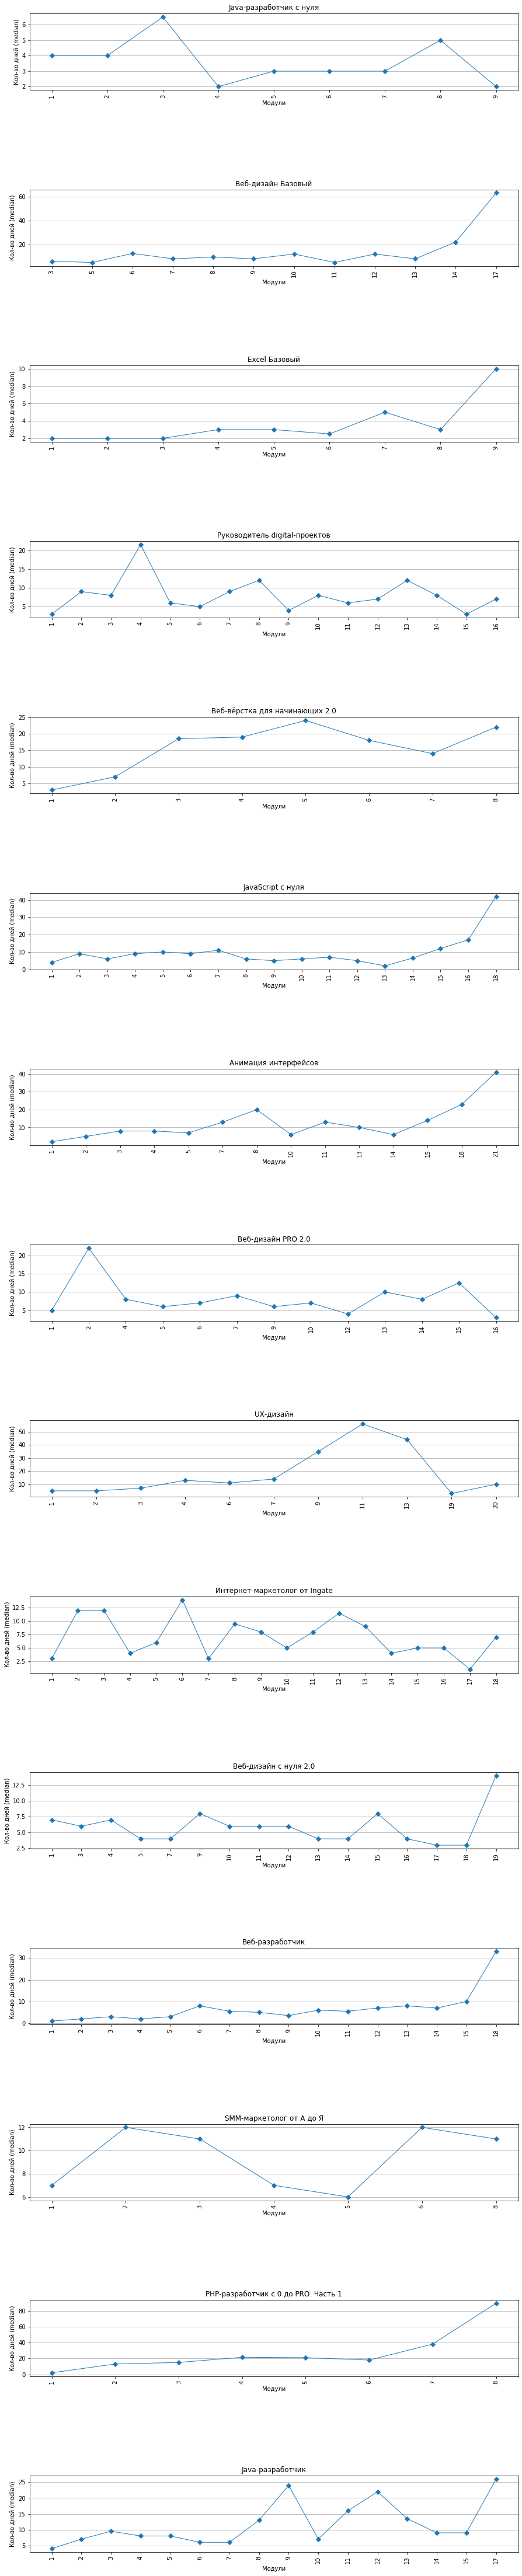

In [40]:
fig = plt.figure()

# Выводим графики
for number, name_course in enumerate(df_courses.title):    
    x = [str(i[1]) for i in df_group_module_passing.index if i[0] == name_course]
    y = [df_group_module_passing.values[number][3] for number, value in enumerate(df_group_module_passing.index) if value[0] == name_course]
    
    grafic = fig.add_subplot(15, 1, number + 1, title = name_course)
    grafic.plot(x, y, linewidth=1, marker='D')
    
    plt.xlabel('Модули')
    plt.ylabel('Кол-во дней (median)')
    plt.xticks(x, rotation='vertical')
    fig.set_figwidth(15)
    fig.set_figheight(80)
    plt.grid(axis='y')
    plt.subplots_adjust(wspace=0, hspace=1.3)

### 3.3

In [41]:
# Подготавливаем датасет
df_median_month = df_main[['course_title', 'start_date', 'finish_date', 'is_homework']]

# Оставляем только дату без времени
def date_without_time(date):
    try:
        return date.split()[0]
    except AttributeError:
        return date
df_median_month['start_date'] = df_median_month['start_date'].apply(date_without_time)
df_median_month['finish_date'] = df_median_month['finish_date'].apply(date_without_time)

# Приводим к datetime
df_median_month['start_date'] = pd.to_datetime(df_median_month['start_date'], errors='coerce')
df_median_month['finish_date'] = pd.to_datetime(df_median_month['finish_date'], errors='coerce')

# Удаляем нулевые значения
df_median_month.dropna(subset=['finish_date'], inplace=True)

# Готовим DF гле будут только домашние работы
df_median_homework_month = df_median_month[df_median_month.is_homework == True]
df_median_homework_month = df_median_homework_month[['course_title', 'start_date', 'finish_date']]

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [42]:
# Создаем DF
df_median_homework_month_all_days = pd.DataFrame(columns=['course_title', 'start_date', 'finish_date'])

In [43]:
# Функция добавления строк в DF
def function_add_line(start_d, finish_d, title_course):
    maska_value = {'course_title': title_course,
                  'start_date': start_d,
                  'finish_date': finish_d}
    df_median_homework_month_all_days.loc[len(df_median_homework_month_all_days) + 1] = maska_value
    
# Функция добавления в DF если разный год или месяц
def function(start_d, finish_d, title_course):
    finish_d_day = datetime(start_d.year, start_d.month, calendar.monthrange(start_d.year,start_d.month)[1])
    end_value = True
    while end_value:
        function_add_line(start_d, finish_d_day, title_course)

        start_d += relativedelta(months=1)
        start_d = datetime(start_d.year, start_d.month, 1)
        finish_d_day = datetime(start_d.year, start_d.month, calendar.monthrange(start_d.year,start_d.month)[1])
        if finish_d_day > finish_d:
            finish_d_day = finish_d
            function_add_line(start_d, finish_d_day, title_course)
            end_value = False


# Добавляем данные (время выполнения ДЗ) по тем строкам, которые тянутся на несколько месяцев
for value in df_median_homework_month.values:
    start_d = value[1]
    finish_d = value[2]
    title_course = value[0]
    
    if start_d.year == finish_d.year:
        if start_d.month == finish_d.month:
            function_add_line(start_d, finish_d, title_course)
        else:
            function(start_d, finish_d, title_course)
    else:
        function(start_d, finish_d, title_course)
                
    

In [44]:
# Добавляем столбцы месяц и год
df_median_homework_month_all_days['month'] = df_median_homework_month_all_days['start_date'].dt.month
df_median_homework_month_all_days['year'] = df_median_homework_month_all_days['start_date'].dt.year

# Номер месяца в названии месяца
df_median_homework_month_all_days['month_name'] = df_median_homework_month_all_days['month'].apply(lambda x: calendar.month_abbr[x])

# Вычисляем разницу
df_median_homework_month_all_days['days_difference'] = df_median_homework_month_all_days['finish_date'] - df_median_homework_month_all_days['start_date']

# Преобразовываем timedelta в float
f = lambda x: x / np.timedelta64(1, 'D')
df_median_homework_month_all_days['days_difference'] = df_median_homework_month_all_days['days_difference'].apply(f)

In [45]:
# Добавляем пустые значения за те месяца где не было выполнение ДЗ 
for name_courses in df_courses.title:
    for year_step in range(2018, 2020, 1):
        for month_step in range(1, 13, 1):
            maska = (df_median_homework_month_all_days.course_title == name_courses) & \
                    (df_median_homework_month_all_days.year == year_step) & \
                    (df_median_homework_month_all_days.month == month_step)
            # Проверяем, есть ли по "названию курса" в "году"&"месяце" данные
            if len(df_median_homework_month_all_days[maska]) == 0:
                value_month = '0' + str(month_step) if month_step < 10 else month_step
                # Готовим данные для добавления
                progress_row = {'course_title': name_courses, 
                                'start_date': np.nan,
                                'finish_date': np.nan,
                                'month': month_step,
                                'month_name': calendar.month_abbr[month_step],
                                'days_difference': 0,
                                'year': year_step}
                # Добавляем строку
                df_median_homework_month_all_days.loc[len(df_median_homework_month_all_days) + 1] = progress_row

In [46]:
# Группируем и выводим
df_group_homework_month_all_days = df_median_homework_month_all_days.groupby(['course_title', 'month', 'month_name']).agg({'days_difference': 'median'})
df_group_homework_month_all_days.columns = ['days_median']
df_group_homework_month_all_days.head(15)

days_median
course_title     month month_name             
Excel Базовый    1     Jan                 2.0
                 2     Feb                 2.0
                 3     Mar                 3.0
                 4     Apr                 2.0
                 5     May                 3.0
                 6     Jun                 2.0
                 7     Jul                 2.0
                 8     Aug                 3.0
                 9     Sep                 2.0
                 10    Oct                 2.0
                 11    Nov                 2.0
                 12    Dec                 4.0
Java-разработчик 1     Jan                 5.0
                 2     Feb                 4.5
                 3     Mar                 6.0

### 3.4

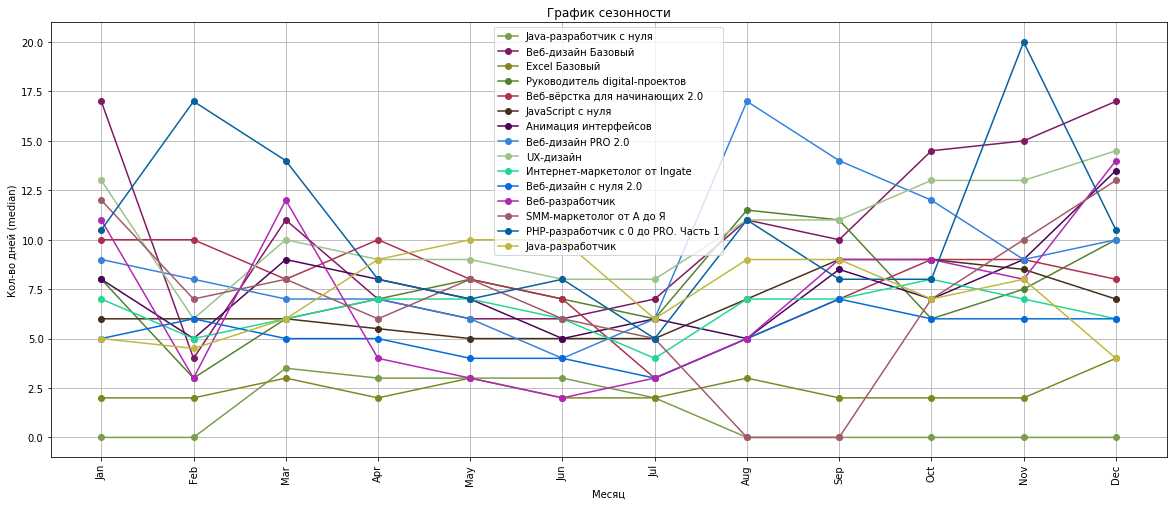

In [47]:
fig, ax = plt.subplots()
r = lambda: random.randint(0,255)

# Формируем график
for number, name_course in enumerate(df_courses.title):    
    x = [i[2] for i in df_group_homework_month_all_days.index if i[0] == name_course]
    y = [df_group_homework_month_all_days.values[number][0] for number, value in enumerate(df_group_homework_month_all_days.index) if value[0] == name_course]
    ax.plot(x,y, label=name_course, marker='o', color='#%02X%02X%02X' % (r(),r(),r()))

# Выводим график
plt.xlabel('Месяц')
plt.ylabel('Кол-во дней (median)')
plt.title('График сезонности')
plt.xticks(x, rotation='vertical')
fig.set_figwidth(20)
fig.set_figheight(8)
plt.grid(axis='y')
plt.grid(axis='x')
plt.legend()
plt.show()

## Заключение 3
Имеются проблемные модули на таких курсах как "Веб-дизайн PRO 2.0", "Руководитель digital-проектов" т.к. один из модлулей сильно превышает среднее время прохождения. 
Сезонность обучения начинается с августа по декабрь. 

## 4. Расчет конверсии

**1**. [Расчитываю конверсию перехода студентов из одного модуля в другой на каждом курсе.](#4.1)<br>
**2**. [Строю bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе.](#4.2)<br>
**3**. [Строю горизонтальный bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. 15 графиков.](#4.3)<br>
**4**. [На основании рассчитанных значений делаю аналитический вывод.](#Заключение-4)

### 4.1

In [48]:
# Подготавливаем датасет
df_conversion_students = df_main[['course_title', 'module_number', 'student_id', 'start_date', 'finish_date', 'is_homework', 'status', 'module_title', 'course_field']]

# Оставляем только дату без времени
def date_without_time(date):
    try:
        return date.split()[0]
    except AttributeError:
        return date
df_conversion_students['start_date'] = df_conversion_students['start_date'].apply(date_without_time)
df_conversion_students['finish_date'] = df_conversion_students['finish_date'].apply(date_without_time)

# Приводим к datetime
df_conversion_students['start_date'] = pd.to_datetime(df_conversion_students['start_date'], errors='coerce')
df_conversion_students['finish_date'] = pd.to_datetime(df_conversion_students['finish_date'], errors='coerce')

# Готовим DF где будут только домашние работы
df_conversion_student = df_conversion_students[df_conversion_students.is_homework == True]

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [49]:
# Группируем
df_group_conversion = df_conversion_student.groupby(['course_title', 'module_number', 'module_title', 'course_field'], as_index=False).agg({'start_date': 'count', 'finish_date': 'count'})

# Создаем DF
df_group_conversion_student = pd.DataFrame(columns=['course_title', 'module_number', 'module_title', 'convertion', 'course_field'])

# Цикл расчета отношения и заполнение DF
for name_courses in df_courses.title:
    b = 0
    for value in df_group_conversion[df_group_conversion.course_title == name_courses].values:
        a = value[4]
        try:
            convertion_value = a / b
        except ZeroDivisionError:
            convertion_value = 0
        maska_conversion = {'course_title': name_courses, 
                            'module_number': value[1],
                            'module_title': value[2],
                            'convertion': convertion_value, 
                           'course_field': value[3]}
        df_group_conversion_student.loc[len(df_group_conversion_student) + 1] = maska_conversion
        b = value[5]

In [50]:
df_group_conversion_student[['course_title', 'module_number', 'convertion']].sort_values(['course_title', 'module_number'])

,course_title,module_number,convertion
22,Excel Базовый,1,0
23,Excel Базовый,2,0.947598
24,Excel Базовый,3,0.980296
25,Excel Базовый,4,0.891473
26,Excel Базовый,5,0.983498
...,...,...,...
42,Руководитель digital-проектов,12,0.969388
43,Руководитель digital-проектов,13,0.988636
44,Руководитель digital-проектов,14,1.02899
45,Руководитель digital-проектов,15,1.03125


### 4.2

In [51]:
# Генерируем значения Y
y = []
for i in range(1, 22, 1):
    values_modul = []
    for name_c in df_courses.title:
        value = df_group_conversion_student[(df_group_conversion_student.course_title == name_c) & (df_group_conversion_student.module_number == i)]
        values_modul.append(value.values[0][3] if len(value) != 0 else 0)
    y.append(values_modul)


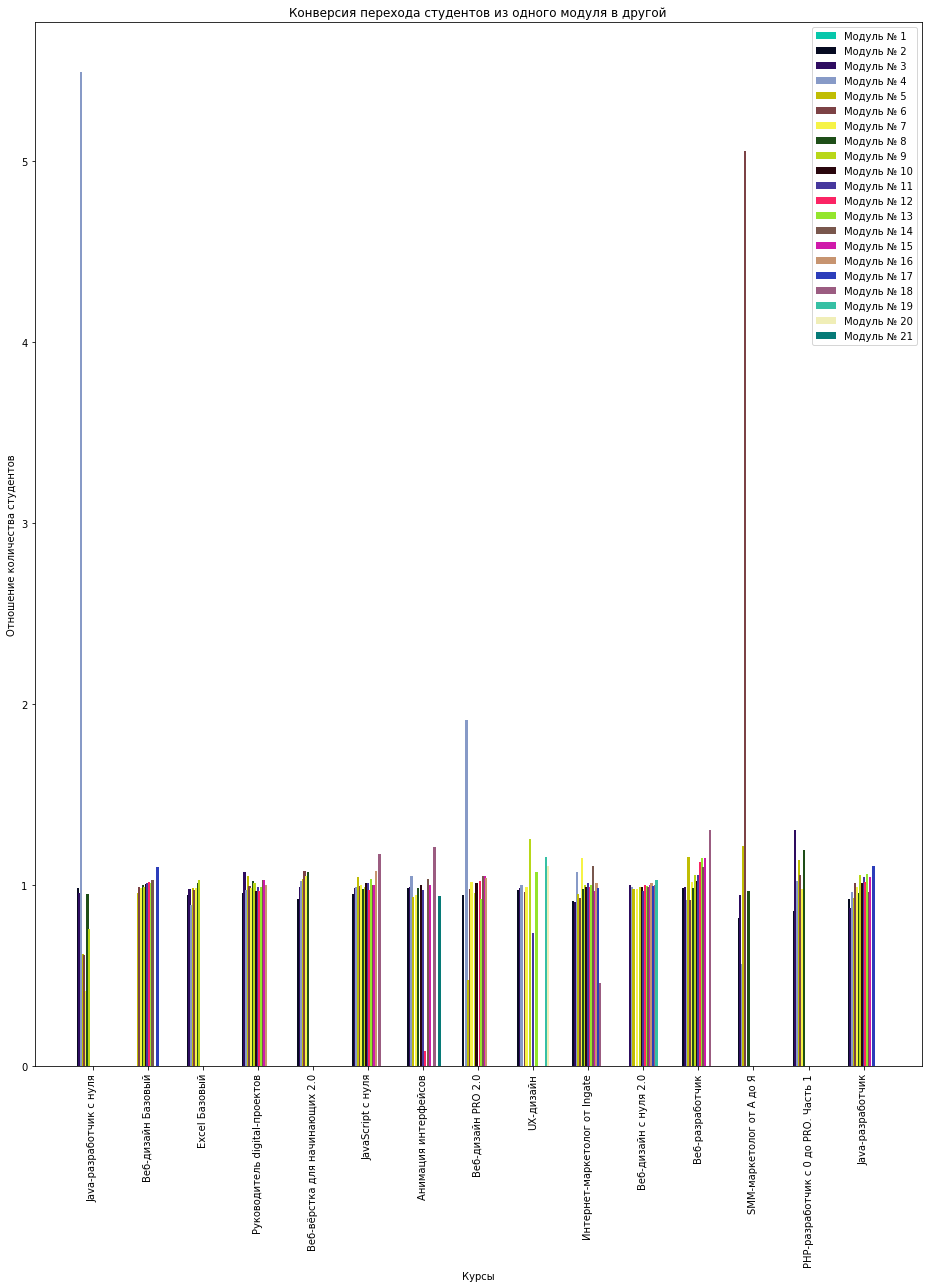

In [52]:
# # Функция для наименования колонок
# def autolabel(rects, label, step):
#     for rect in rects:
#         height = rect.get_height()
#         if height != 0:
#             ax.annotate('№' + str(label + 1),
#                         xy=(rect.get_x(), height + step),
#                         xytext=(0, 3),
#                         textcoords="offset points",
#                         ha='center', va='bottom')

# Строим график
r = lambda: random.randint(0,255)
labels = [name_c for name_c in df_courses.title]

x = np.arange(len(labels))
width = 0.04

fig, ax = plt.subplots()

step_width = 0
step_height = 0
for number in range(0, 21, 1):
    y_y = y[number]
    rects = ax.bar((x + step_width) - 0.3, y_y, width, label='Модуль № {}'.format(str(number + 1)), align='center', color='#%02X%02X%02X' % (r(),r(),r()))
    #     autolabel(rects=rects, label=number, step=step_height) # Раскомментировать если нужно наименование колонок
    step_width += 0.03
    step_height += 0.07

ax.set_ylabel('Отношение количества студентов')
ax.set_title('Конверсия перехода студентов из одного модуля в другой')
fig.set_figwidth(13)
fig.set_figheight(18)
plt.xticks(x, rotation='vertical')
plt.xlabel('Курсы')
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

### 4.3

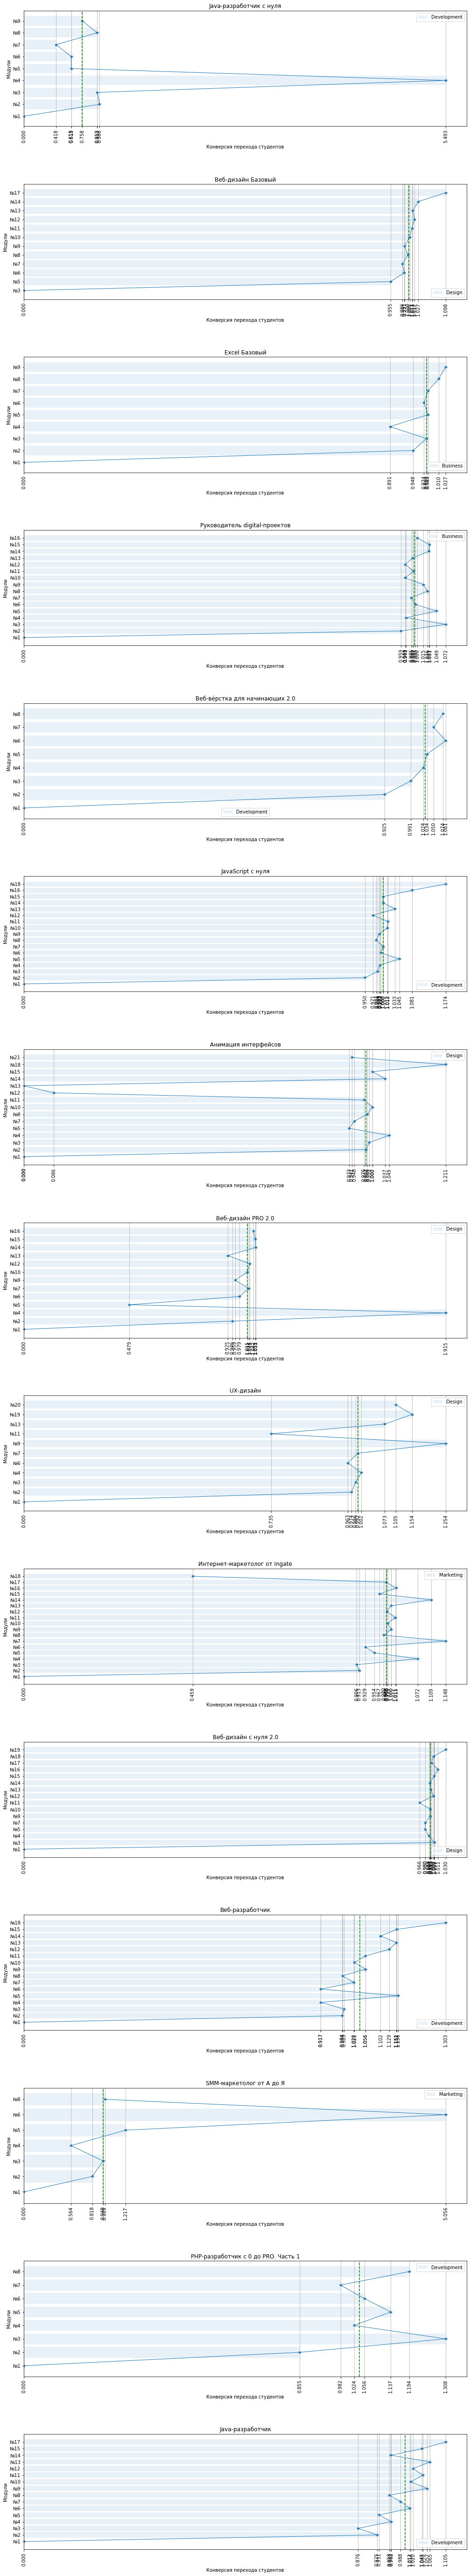

In [53]:
fig = plt.figure()

# Выводим графики
for number, name_course in enumerate(df_courses.title):   
#     Готовим данные
    x = [i[3] for i in df_group_conversion_student.values if i[0] == name_course]
    y = ['№' + str(df_group_conversion_student.values[number][1]) for number, value in enumerate(df_group_conversion_student.values) if value[0] == name_course]
    y_y = np.arange(len(y))
    label = label = df_group_conversion_student.course_field[df_group_conversion_student.course_title == name_course]
    heights = pd.Series(x, name='Heights')
    median = heights.median()
#     Добавляем фигуры и строим графики
    grafic = fig.add_subplot(15, 1, number + 1, title = name_course)
    grafic.barh(y_y, x, label=label.values[0], align='center', alpha=0.1)
    grafic.plot(x, y, linewidth=1, marker='*')
#     Выводим информацию о каждом графике
    plt.yticks(y_y, y)
    plt.xticks(x, rotation='vertical')
    plt.xlabel('Конверсия перехода студентов')
    plt.ylabel('Модули')
    plt.legend()
    plt.axvline(median, color='g', linestyle='--')
#     Назначаем доп.инф.
    fig.set_figwidth(17)
    fig.set_figheight(100)
    plt.grid(axis='x')
    plt.subplots_adjust(wspace=0, hspace=0.5)

## Заключение 4
Самая стабильная конверсия по переходу студентов имеется в таких курсах как: "JavaScript с нуля", "Руководитель digital-проектов", "Веб-дизайн с нуля 2.0". 
Самой низкой конверсией по переходу студентов на последний модуль является курс "Интернет-маркетолог от Ingate".
Самой высокой конверсией по переходу студентов на последний модуль является курс "Веб-разработчик".